# **MODELO LÓGISTICO CRECIMIENTO DE BATERIA EN GLUCONATO DE SODIO**

Para esta tarea, se analizará el crecimiento de una bacteria en gluconato de sodio en una placa durante aproximadamente 50 horas.

Los datos fueron extraídos de un repositorio GitHub donde se encontraron los crecimientos de una bacterias en diferentes medios. Se seleccionó el medio en el cuál el crecimiento de la bacteria tuviera un comportamiento similar al logístico. 

Link base de datos:
https://github.com/Brakjen/Bacteria-Growth-Curve-Analysis/blob/main/SampleData/Artificial1.csv

In [13]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

En primer lugar, vamos a leer la base de datos y verificar por medio de un grafico que los datos siguen una tendencia de un modelo logístico

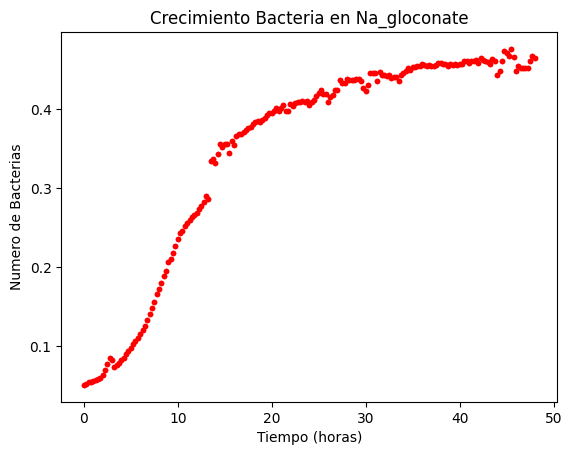

In [14]:
# Lectura de base la base de datos
df = pd.read_excel("datos.xlsx")

x = df["Tiempo"].to_numpy() #tiempo n
y = df["D9"].to_numpy() #poblacion en el momento n
y1 = df["Diferencias"].to_numpy() #diferencias

#graficar datos
plt.plot(x,y,".r")
plt.plot(x, y, '.r')
plt.title("Crecimiento Bacteria en Na_gloconate")
plt.ylabel("Numero de Bacterias")
plt.xlabel("Tiempo (horas)")
plt.show()

# Modelo Discreto

Vamos a suponer en primer lugar, que la capacidad de carga del sistema es de 0.47.

Ahora bien, para encontrar r, convertimos la ecuación de crecimiento logístico discreto a llevarla a la forma $y=ax$, donde nuestro valor de $r$, es la pendiente, $y=P_n - P_{n-1}$, es decir las diferencias y $x=(K-P_n)P_n$.

Ahora, para $r$ utilizaremos una aproximación por mínimos cuadrados. 

Valor de r: 0.10169042452710415


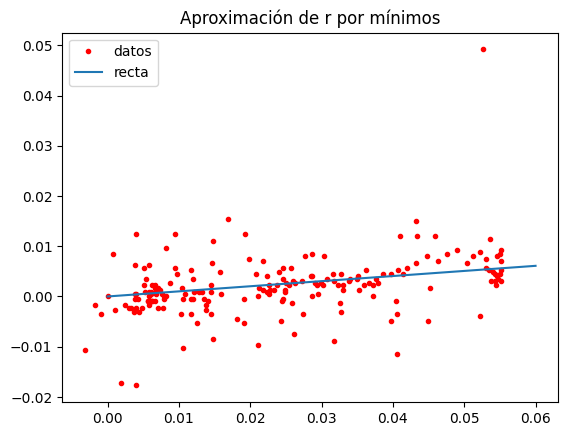

In [15]:
k = 0.47 #capacidad de carga del sistema

#nuevos arreglos de "x" y "y" para ajustar minimos
x_d = x[:-1]
x_d = np.insert(x_d,0,0)
y_d = y[:-1]
y_d = np.insert(y_d,0,0)
y1_d = y1[:-1]
y1_d = np.insert(y1_d,0,0)

#nuevo vector
xi = (k-y_d)*y_d
yi = y1_d

r = np.sum(y1*xi)/np.sum(xi**2)
print("Valor de r:", r)

x_mc = np.linspace(0,0.06,100)
y_mc = x_mc*r 

plt.plot(xi,y1_d,'.r',label="datos")
plt.plot(x_mc,y_mc,label="recta")
plt.title("Aproximación de r por mínimos")
plt.legend()
plt.show()

Ya teniendo los valores de $r$ y $k$; vamos a crear el nuevo modelo y ver su error.

Error: 0.24406973031106852
Valor de r: 0.10169042452710415
Valor de k: 0.47


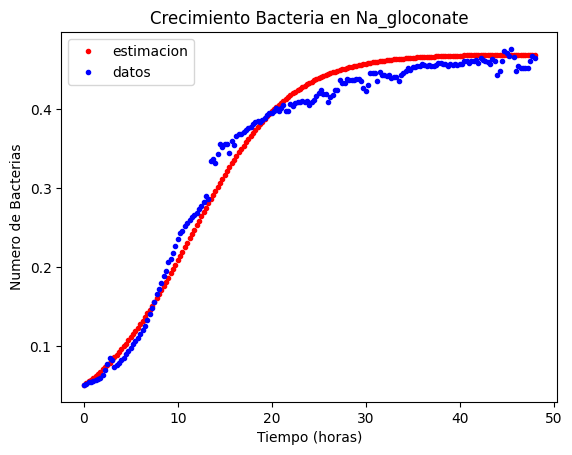

In [16]:
#funcion que toma k, un punto inical, r, y y un vector r. Retorna el error y los valores de y
def estimacion(k, P0, r, y):
    l = [P0] #poblacion inicial
    #calculamos la poblacion siguiente a partir del modelo de ecuacion logistica 
    for i in range(len(y)-1):
        l_next = l[-1] + r * (k - l[-1]) * l[-1]
        l.append(l_next)
    #calcular el error cuadratico
    er = np.linalg.norm(l-y,2)
    return er,l

P0 = y[0]
emin, les = estimacion(k,P0,r,y)

#mostramos los resultados
print("Error:", emin)
print("Valor de r:", r)
print("Valor de k:", k)
plt.plot(x,les,'.r',label="estimacion")
plt.plot(x,y,'.b',label="datos")
plt.legend()
plt.title("Crecimiento Bacteria en Na_gloconate")
plt.ylabel("Numero de Bacterias")
plt.xlabel("Tiempo (horas)")
plt.show()

# Modelo continuo

Teniendo en cuenta el modelo continuo:

$$\frac{dP}{dt}=r\frac{K-P}{K}P$$

Ahora bien, suponiendo un valor de $k$ mayor a todos los del conjunto de datos, despejamos $r$ y obtenemos

$$rt= ln(\frac{P_0*(K-P)}{P})$$

Podemos aplicar mínimos similarmente al caso discreto para encontrar el valor de $r$.

valor de r 0.17057820468405432


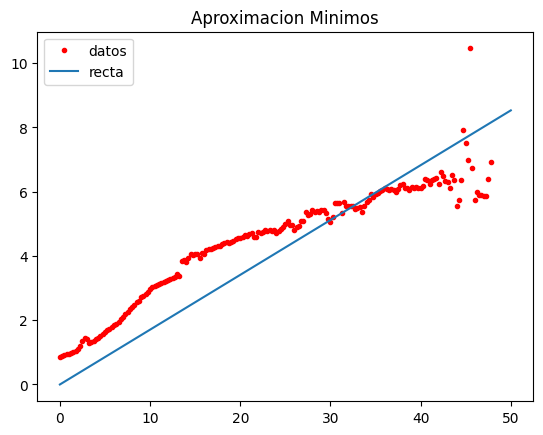

In [19]:
k = 0.477
P0 = y[0]

x_c = x[:-1]
y_c = y[:-1]
y1_c = y1[:-1]

#nuevo vector
yi = -np.log((P0*(k-y_c)/y_c))
xi = x_c

r = np.sum(yi*xi)/np.sum(xi**2)
print("valor de r", r)

x_mc = np.linspace(0,50,100)
y_mc = x_mc*r 

plt.plot(xi,yi,'.r',label="datos")
plt.plot(x_mc,y_mc,label="recta")
plt.title("Aproximacion Minimos")
plt.legend()

Ya teniendo los valores $r$ y $k$, los ajustamos al modelo para calcular la población en el momento $t$, y vemos su error

Error: 1.102528226237168
Valor de r: 0.17057820468405432
Valor de k: 0.477


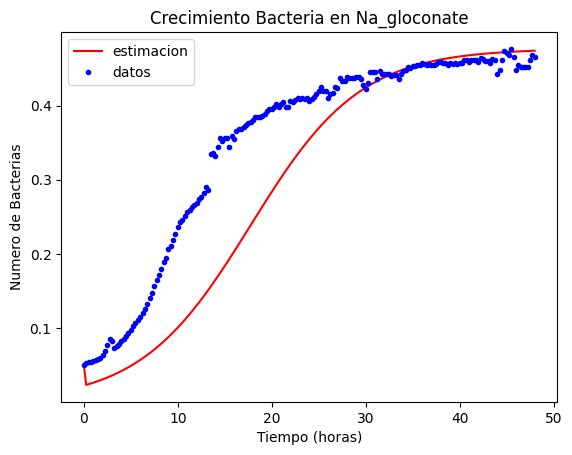

In [18]:
#funcion que toma k, un punto inical, r, y y un vector r. Retorna el error y los valores de y
def estimacion(k, P0, r, x):
    l = [P0] #poblacion inicial
    #calculamos la poblacion siguiente a partir del modelo de ecuacion logistica 
    for i in range(len(x)-1):
        l_next = (P0*k*np.exp(x[i]*r))/(1+P0*np.exp(x[i]*r))
        l.append(l_next)
    #calcular el error cuadratico
    er = np.linalg.norm(l-y,2)
    return er,l

P0 = y[0]
emin, les = estimacion(k,P0,r,x)

#mostramos los resultados
print("Error:", emin)
print("Valor de r:", r)
print("Valor de k:", k)
plt.plot(x,les,'-r',label="estimacion")
plt.plot(x,y,'.b',label="datos")
plt.legend()
plt.title("Crecimiento Bacteria en Na_gloconate")
plt.ylabel("Numero de Bacterias")
plt.xlabel("Tiempo (horas)")
plt.show()